# LM Mathematical Foundations of Artificial Intelligence (AI) and Machine Learning (ML)

# University Admission Prediction Using Linear Regression



## Letian Li / 2214560

# Section 1: Implementation of Gradient Descent Optimisation Algorithms 

* Standard Gradient Descent 
* Stochastic Gradient Descent 
* Mini-batch Gradient Descent 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

## Step 1: Loading the Data

In [2]:
# Read the data from file
url = "Admission_Predict_Ver1.1.csv"
candidates = np.genfromtxt(url, delimiter=",", skip_header=1, usecols=(range(1,9)))

# print out the content of candidates
# print(candidates)
# print(candidates.shape)

In [3]:
# Head: GRE Score / TOEFL Score / University Rating / SOP / LOR / CGPA / Research / Chance of Admit 
# extract Chance of Admit data from candidates variable
admit_chance  = candidates[:,-1].reshape(500,1)
# print(admit_chance)
# print(admit_chance.shape)

# extract other columns data from candidates variable
candidates_scores  = candidates[:,:-1]
# print(candidates_scores)
# print(candidates_scores.shape)

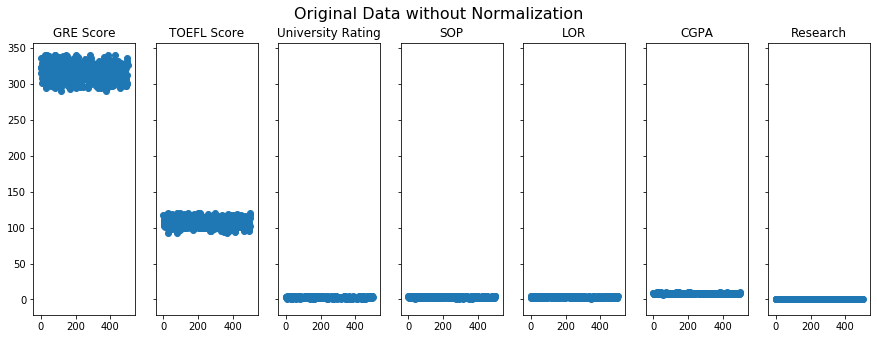

In [4]:
col_num = candidates_scores.shape[1]
fig, axs = plt.subplots(nrows = 1, ncols = col_num, sharex=True, sharey=True, figsize=(15, 5))
for col_i in range(col_num):
    axs[col_i].scatter(range(len(candidates_scores)), candidates_scores[:,col_i])

# Set title
# GRE Score / TOEFL Score / University Rating / SOP / LOR / CGPA / Research
axs[0].set_title("GRE Score")
axs[1].set_title("TOEFL Score")
axs[2].set_title("University Rating")
axs[3].set_title("SOP")
axs[4].set_title("LOR")
axs[5].set_title("CGPA")
axs[6].set_title("Research")
plt.suptitle('Original Data without Normalization',fontsize=16)
plt.show()

## Step 2: Normalization

In [5]:
# Data Processing - Z-score normalization
# (value-mean)/std
candidates_scores_mean = np.mean(candidates_scores, axis=0)
candidates_scores_std = np.std(candidates_scores,axis=0)
candidates_scores = (candidates_scores - candidates_scores_mean) / candidates_scores_std

# print(candidates_scores)

In [6]:
# # Data Processing - Min-max normalization
# # (value-min)/(max-min)
# candidates_scores_max = np.max(candidates_scores, axis=0)
# candidates_scores_min = np.min(candidates_scores,axis=0)
# candidates_scores = (candidates_scores - candidates_scores_min) / (candidates_scores_max - candidates_scores_min)

# print(candidates_scores)

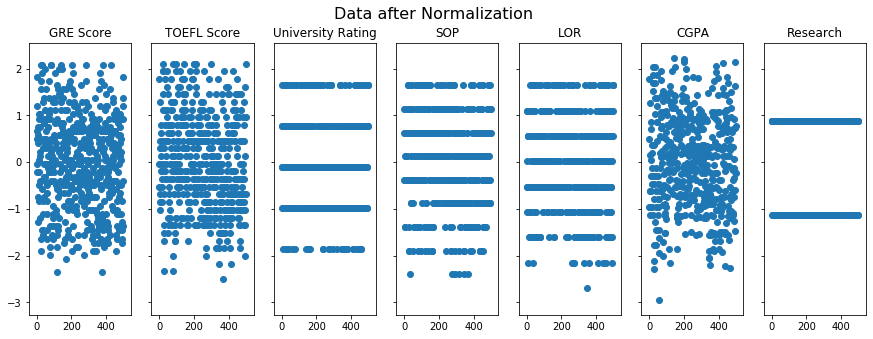

In [7]:
col_num = candidates_scores.shape[1]
fig, axs = plt.subplots(nrows = 1, ncols = col_num, sharex=True, sharey=True, figsize=(15, 5))
for col_i in range(col_num):
    axs[col_i].scatter(range(len(candidates_scores)), candidates_scores[:,col_i])

# Set title
# GRE Score / TOEFL Score / University Rating / SOP / LOR / CGPA / Research
axs[0].set_title("GRE Score")
axs[1].set_title("TOEFL Score")
axs[2].set_title("University Rating")
axs[3].set_title("SOP")
axs[4].set_title("LOR")
axs[5].set_title("CGPA")
axs[6].set_title("Research")
plt.suptitle('Data after Normalization',fontsize=16)
plt.show()

## Step 3: Modeling

In [8]:
# Add a first column with all the value of 1 to the candidates_scores matrix (Let x0 = 1)
candidates_scores = np.insert(candidates_scores, 0, 1, 1)
# print(candidates_scores)
# print(candidates_scores.shape)

In [9]:
# Split the dataset into training and validation sets
indx = np.arange(candidates.shape[0])
# print(indx)
np.random.shuffle(indx)
# print(indx)

indx_train = indx[:400]     # first 400 for training
indx_val = indx[-100:]      # remaining 100 for validation
# print((np.append(indx_train, indx_val)) == indx)

x_train, y_train = candidates_scores[indx_train], admit_chance[indx_train]
x_val, y_val = candidates_scores[indx_val], admit_chance[indx_val]
# print((np.vstack((train_candidates_scores,val_candidates_scores))) == candidates_scores)
# print((np.vstack((train_admit_chance,val_admit_chance))) == admit_chance)

In [10]:
# Ols Function to find the Closed-Form Solution
def ols(x,y):
    return np.linalg.solve(x.T@x, x.T@y)

# Call the ols function
ols = ols(x_train, y_train)
# print("ols:", ols.squeeze())

In [11]:
def validation_model(theta, e=0, plt=None, label=None, print_metrics=False):
    if e:
        e = initialize_e(x_val.shape[0])
    y_pred = linear_func(x_val, theta, e)

    # R_Square
    y_val_mean = np.mean(y_val)
    SStot = np.sum((y_val - y_val_mean)**2)
    SSres = np.sum((y_val - y_pred)**2)
    R_Square  = 1 - SSres/SStot
    
    # RMSE
    RMSE  = np.sqrt(np.mean((y_val-y_pred)**2))
    
    if label and plt:
        plt.scatter( y_pred , y_val, label=label)
    
    if print_metrics:
        print("\n----------%s----------" % label)
        print("Theta:", theta.squeeze())
        print("R_Square:",R_Square)
        print("RMSE:",RMSE)
    
    return R_Square, RMSE

In [12]:
# Define the linearmodel function
def linear_func(X, theta, e=0):
    return X @ theta + e


# Cost function
def J(X, Y, theta, e=0):
    return 0.5*(np.sum((linear_func(X, theta, e)-Y)**2))


# Derivative of the cost function
def J_d(X, Y, theta, e=0):
#     print(X.shape)
#     print(Y.shape)
#     print(theta.shape)
    return X.T @ (linear_func(X, theta, e)-Y)

In [13]:
# Standard Gradient Descent 
def standard_gradient_descent(theta, e=0, eta=0.001, epoch=500):
#     Learning rate η
#     eta = 0.001

    loss_list = list()
    r_square_list = list()
    rmse_list = list()
    
    # compute iteration in each epoch 
    iteration = int(len(x_train) / len(x_train))
    
    for i_epoch in range(epoch):
        # update values of theta in each iteration
        for i_iteration in range(iteration):  
            if e:
                e = initialize_e(x_train.shape[0])

            # compute current loss before update
            loss = J(x_train, y_train, theta, e)
            loss_list.append(loss)

            # validate current theta before update
            R_Square, RMSE = validation_model(theta, e)
            r_square_list.append(R_Square)
            rmse_list.append(RMSE)

            # update theta via Gradient Descent
            theta = theta - eta * J_d(x_train, y_train, theta, e)
        
    return theta, loss_list, r_square_list, rmse_list

In [14]:
# Stochastic Gradient Descent 
def stochastic_gradient_descent(theta, e=0, eta=0.1, epoch=10):
#     Learning rate η
#     eta = 0.1
    
    loss_list = list()
    r_square_list = list()
    rmse_list = list()
    
    # compute iteration in each epoch 
    iteration = int(len(x_train) / 1)
    
    for i_epoch in range(epoch):
        # update values of theta in each iteration
        for i in range(iteration):   
            if e:
                e = initialize_e(idx[0])

            # choose indexes in random
            idx = np.arange(x_train.shape[0])
            np.random.shuffle(idx)

            # choose a random sample by the first index of random indexes
            X = x_train[idx[0]].reshape(theta.T.shape)
            Y = y_train[idx[0]]

            # compute current loss before update
            loss = J(X, Y, theta, e)
            loss_list.append(loss)

            # validate current theta before update
            R_Square, RMSE = validation_model(theta, e)
            r_square_list.append(R_Square)
            rmse_list.append(RMSE)

            # update theta via Gradient Descent
            theta = theta - eta * J_d(X, Y, theta, e)
        
    return theta, loss_list, r_square_list, rmse_list

In [15]:
# Mini-batch Gradient Descent
def mini_batch_gradient_descent(theta, e=0, eta=0.01, epoch=10, batch_size=40):
#     Learning rate η
#     eta = 0.01

#     Setting Batch size
#     batch_size = 20

    loss_list = list()
    r_square_list = list()
    rmse_list = list()
    
    # compute iteration in each epoch 
    iteration = int(len(x_train) / batch_size)
    
    for i_epoch in range(epoch):
        # update values of theta in each iteration
        for i in range(iteration):   
            if e:
                e = initialize_e(batch_size)

            # choose indexes in random
            idx = np.arange(x_train.shape[0])
            np.random.shuffle(idx)

            # choose random samples by random indexes
            X = x_train[idx[:batch_size]]
            Y = y_train[idx[:batch_size]]

            # compute current loss before update
            loss = J(X, Y, theta, e) / batch_size
            loss_list.append(loss)

            # validate current theta before update
            R_Square, RMSE = validation_model(theta, e)
            r_square_list.append(R_Square)
            rmse_list.append(RMSE)

            # update theta via Gradient Descent
            theta = theta - eta / batch_size * J_d(X, Y, theta, e)
        
    return theta, loss_list, r_square_list, rmse_list

In [16]:
#  Randomly initialize the vector of parameters θ (include interception) 
def initialize_theta(rows):
    theta = np.random.rand(rows).reshape(rows,1)
    # theta = np.zeros(rows).reshape(rows,1)
    return theta

theta = initialize_theta(x_train.shape[1])

# Initialize the disturbance term or error variable ε
def initialize_e(rows):
#     e = np.random.randn(rows).reshape(rows,1) / 10
    e = 0
#     e = np.zeros(rows).reshape(rows,1)
    return e

e  = initialize_e(x_train.shape[0])

# print(J(x_train, y_train, theta, e))

## Step 4: Training Model

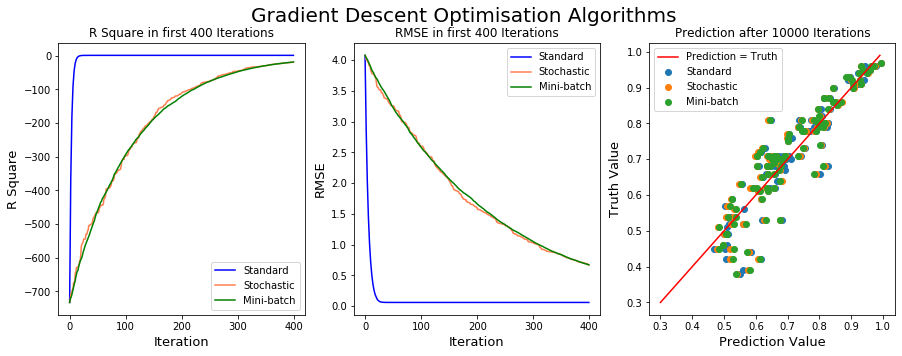

In [17]:
# Set Hyperparameters
eta = 0.001
batch_size = 20
iteration_list = np.array([10000, 10000, 10000])
epoch = (iteration_list / [1, len(x_train), len(x_train)/batch_size]).astype(int)

# Plot
fig, axs = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey=False, figsize=(15, 5))
plt.suptitle('Gradient Descent Optimisation Algorithms',fontsize=20)
N_0 = 400
N_1 = 400
# R Square Plot
axs[0].set_xlabel('Iteration', fontdict={'weight': 'normal', 'size': 13})
axs[0].set_ylabel('R Square', fontdict={'weight': 'normal', 'size': 13})
axs[0].set_title("R Square in first %s Iterations" % N_0)
# RMSE Plot
axs[1].set_xlabel('Iteration', fontdict={'weight': 'normal', 'size': 13})
axs[1].set_ylabel('RMSE', fontdict={'weight': 'normal', 'size': 13})
axs[1].set_title("RMSE in first %s Iterations" % N_1)
# Prediction Plot
x = np.arange(0.3, 1, 0.01)    
axs[2].plot(x, x, 'r-', label="Prediction = Truth")      # Plot the line y_pred = y_val 
axs[2].set_xlabel('Prediction Value', fontdict={'weight': 'normal', 'size': 13})
axs[2].set_ylabel('Truth Value', fontdict={'weight': 'normal', 'size': 13})
axs[2].set_title("Prediction after %s Iterations" % iteration_list[0])

#  Randomly initialize the vector of parameters θ (include interception) 
init_theta = initialize_theta(x_train.shape[1])

# Do Standard Gradient Descent 
optimal_theta, loss_list, r_square_list, rmse_list = standard_gradient_descent(init_theta, eta=eta, epoch=epoch[0])
axs[0].plot(r_square_list[:N_0], "b-", label=u"Standard")
axs[1].plot(rmse_list[:N_1], "b-", label=u"Standard")
validation_model(optimal_theta, label="Standard", plt=axs[2])

# Do Stochastic Gradient Descent 
optimal_theta, loss_list, r_square_list, rmse_list = stochastic_gradient_descent(init_theta, eta=eta, epoch=epoch[1])
axs[0].plot(r_square_list[:N_0], "-", label=u"Stochastic", color='coral') 
axs[1].plot(rmse_list[:N_1], "-", label=u"Stochastic", color='coral') 
validation_model(optimal_theta, label="Stochastic", plt=axs[2])

# Do Mini-batch Gradient Descent
optimal_theta, loss_list, r_square_list, rmse_list =  mini_batch_gradient_descent(init_theta, eta=eta, epoch=epoch[2], batch_size=batch_size)
axs[0].plot(r_square_list[:N_0], "g-", label=u"Mini-batch") 
axs[1].plot(rmse_list[:N_1], "g-", label=u"Mini-batch") 
validation_model(optimal_theta, label="Mini-batch", plt=axs[2])

axs[0].legend(loc="lower right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper left")
plt.show()

# Section 2: Test Hyperparameters 

## Hyperparameter 1: Learning Rate

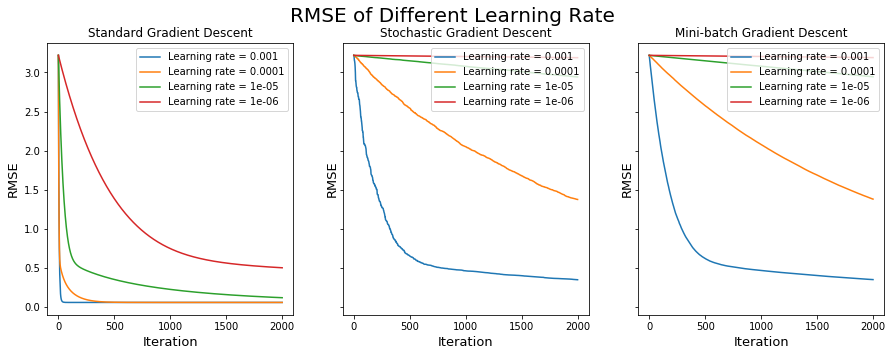

In [18]:
# Test Learning Rate
eta_matrix = [[1e-3, 1e-4, 1e-5, 1e-6],[1e-3, 1e-4, 1e-5, 1e-6],[1e-3, 1e-4, 1e-5, 1e-6]]
batch_size = 40
iteration_list = np.array([2000, 2000, 2000])
epoch = (iteration_list / [1, len(x_train), len(x_train)/batch_size]).astype(int)

# Plot
fig, axs = plt.subplots(nrows = 1, ncols = 3, sharex=True, sharey=True, figsize=(15,5))
plt.suptitle('RMSE of Different Learning Rate',fontsize=20)
axs[0].set_xlabel('Iteration', fontdict={'weight': 'normal', 'size': 13})
axs[0].set_ylabel('RMSE', fontdict={'weight': 'normal', 'size': 13})
axs[0].set_title("Standard Gradient Descent")
axs[1].set_xlabel('Iteration', fontdict={'weight': 'normal', 'size': 13})
axs[1].set_ylabel('RMSE', fontdict={'weight': 'normal', 'size': 13})
axs[1].set_title("Stochastic Gradient Descent")
axs[2].set_xlabel('Iteration', fontdict={'weight': 'normal', 'size': 13})
axs[2].set_ylabel('RMSE', fontdict={'weight': 'normal', 'size': 13})
axs[2].set_title("Mini-batch Gradient Descent")

#  Randomly initialize the vector of parameters θ (include interception) 
init_theta = initialize_theta(x_train.shape[1])

for i in range(len(eta_matrix[0])):
    
    # Standard Gradient Descent
    optimal_theta, loss_list, r_square_list, rmse_list = standard_gradient_descent(init_theta, eta=eta_matrix[0][i], epoch=epoch[0])
    axs[0].plot(rmse_list, "-", label=u"Learning rate = %s" % eta_matrix[0][i])
    
    # Stochastic Gradient Descent
    optimal_theta, loss_list, r_square_list, rmse_list = stochastic_gradient_descent(init_theta, eta=eta_matrix[1][i], epoch=epoch[1])
    axs[1].plot(rmse_list, "-", label=u"Learning rate = %s" % eta_matrix[1][i])
    
    # Mini-batch Gradient Descent 
    optimal_theta, loss_list, r_square_list, rmse_list =  mini_batch_gradient_descent(init_theta, eta=eta_matrix[2][i], epoch=epoch[2])
    axs[2].plot(rmse_list, "-", label=u"Learning rate = %s" % eta_matrix[2][i])

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")
plt.show()

## Hyperparameter 2: Iteration

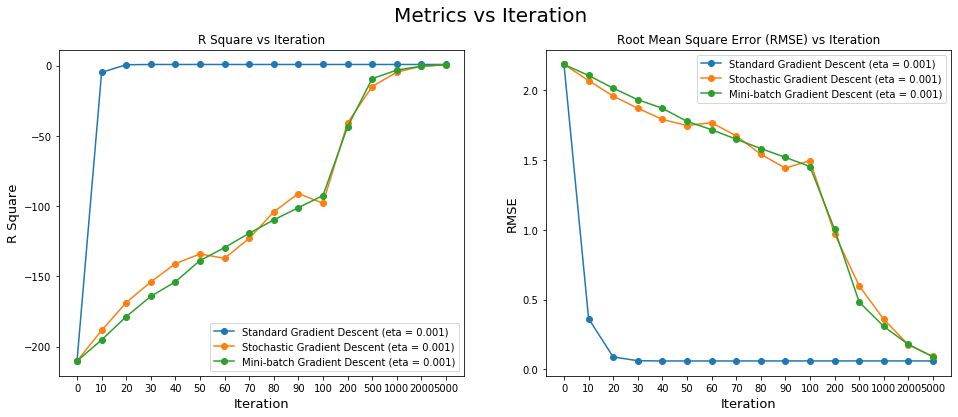

In [19]:
# Test Iteration
eta_list = [1e-3, 1e-3, 1e-3]
batch_size = 40
iteration_list = np.array([1,11,21,31,41,51,61,71,81,91,101,201,501,1001,2001,5001]) # test these iterations in three gradient descent algorithms separately
iteration_matrix = np.ones((3, len(iteration_list))) * iteration_list
epoch_matrix = (iteration_matrix.T / [1, len(x_train), len(x_train)/batch_size]).astype(int).T
epoch_matrix[epoch_matrix<1]=1    # if epoch is smaller than 1, change it to 1

# Plot
fig, axs = plt.subplots(nrows = 1, ncols = 2, sharex=True, sharey=False, figsize=(16, 6))
plt.suptitle('Metrics vs Iteration',fontsize=20)
axs[0].set_xlabel('Iteration', fontdict={'weight': 'normal', 'size': 13})
axs[0].set_ylabel('R Square', fontdict={'weight': 'normal', 'size': 13})
axs[0].set_title("R Square vs Iteration")
axs[1].set_xlabel('Iteration', fontdict={'weight': 'normal', 'size': 13})
axs[1].set_ylabel('RMSE', fontdict={'weight': 'normal', 'size': 13})
axs[1].set_title("Root Mean Square Error (RMSE) vs Iteration")

#  Randomly initialize the vector of parameters θ (include interception) 
init_theta = initialize_theta(x_train.shape[1])

r_square_matrix = np.zeros((3, len(iteration_list)))
rmse_matrix = np.zeros((3, len(iteration_list)))
for i, iteration in enumerate(iteration_list):
    
    # Standard Gradient Descent
    optimal_theta, loss_list, r_square_list, rmse_list = standard_gradient_descent(init_theta, eta=eta_list[0], epoch=epoch_matrix[0,i])
#     R_Square, RMSE = validation_model(optimal_theta)
    r_square_matrix[0,i] = r_square_list[0:iteration][-1]
    rmse_matrix[0,i] = rmse_list[0:iteration][-1]
    
    # Stochastic Gradient Descent
    optimal_theta, loss_list, r_square_list, rmse_list = stochastic_gradient_descent(init_theta, eta=eta_list[1], epoch=epoch_matrix[1,i])
#     R_Square, RMSE = validation_model(optimal_theta)
    r_square_matrix[1,i] = r_square_list[0:iteration][-1]
    rmse_matrix[1,i] = rmse_list[0:iteration][-1]
    
    # Mini-batch Gradient Descent 
    optimal_theta, loss_list, r_square_list, rmse_list =  mini_batch_gradient_descent(init_theta, eta=eta_list[2], epoch=epoch_matrix[2,i])
#     R_Square, RMSE = validation_model(optimal_theta)
    r_square_matrix[2,i] = r_square_list[0:iteration][-1]
    rmse_matrix[2,i] = rmse_list[0:iteration][-1]

# R Square Plot
axs[0].plot(list(range(len(iteration_list))),r_square_matrix[0], "o-", label=u"Standard Gradient Descent (eta = %s)" % eta_list[0])
axs[0].plot(list(range(len(iteration_list))),r_square_matrix[1], "o-", label=u"Stochastic Gradient Descent (eta = %s)" % eta_list[1])
axs[0].plot(list(range(len(iteration_list))),r_square_matrix[2], "o-", label=u"Mini-batch Gradient Descent (eta = %s)" % eta_list[2])

# RMSE Plot
axs[1].plot(list(range(len(iteration_list))),rmse_matrix[0], "o-", label=u"Standard Gradient Descent (eta = %s)" % eta_list[0])
axs[1].plot(list(range(len(iteration_list))),rmse_matrix[1], "o-", label=u"Stochastic Gradient Descent (eta = %s)" % eta_list[1])
axs[1].plot(list(range(len(iteration_list))),rmse_matrix[2], "o-", label=u"Mini-batch Gradient Descent (eta = %s)" % eta_list[2])

axs[0].legend(loc="lower right")
axs[1].legend(loc="upper right")
plt.xticks(list(range(len(iteration_list))),iteration_list-1)
plt.show()

## Hyperparameter 3: Batch Size

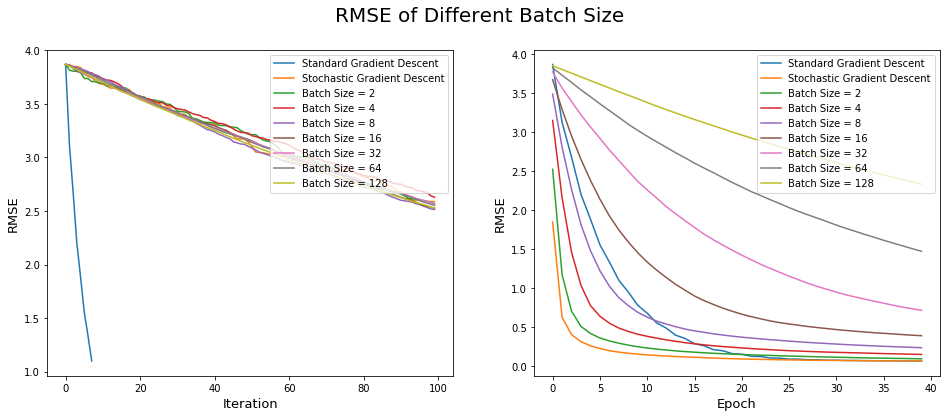

In [20]:
# Test Batch Size
eta = 1e-3
batch_size_list = [2,4,8,16,32,64,128]

# Plot
fig, axs = plt.subplots(nrows = 1, ncols = 2, sharex=False, sharey=False, figsize=(16, 6))
# plt.figure(figsize=(10, 6.5)) 
plt.suptitle('RMSE of Different Batch Size',fontsize=20)
axs[0].set_xlabel('Iteration', fontdict={'weight': 'normal', 'size': 13})
axs[0].set_ylabel('RMSE', fontdict={'weight': 'normal', 'size': 13})
axs[1].set_xlabel('Epoch', fontdict={'weight': 'normal', 'size': 13})
axs[1].set_ylabel('RMSE', fontdict={'weight': 'normal', 'size': 13})

#  Randomly initialize the vector of parameters θ (include interception) 
init_theta = initialize_theta(x_train.shape[1])

# ----------------------------------Test Same Iteration----------------------------------
iteration_list = np.array([500, 500, 500])

epoch = (iteration_list[:2] / [1, len(x_train)]).astype(int)    # compute epoch for Standard and Stochastic Gradient Descent

# Standard Gradient Descent
optimal_theta, loss_list, r_square_list, rmse_list = standard_gradient_descent(init_theta, eta=eta, epoch=epoch[0])
axs[0].plot(rmse_list[:8], "-", label=u"Standard Gradient Descent")

# Stochastic Gradient Descent
optimal_theta, loss_list, r_square_list, rmse_list = stochastic_gradient_descent(init_theta, eta=eta, epoch=epoch[1])
axs[0].plot(rmse_list[:100], "-", label=u"Stochastic Gradient Descent")

# Mini-batch Gradient Descent 
for batch_size in batch_size_list:
    epoch = (iteration_list[2] / [len(x_train)/batch_size]).astype(int).squeeze()   # compute epoch for Mini-batch Gradient Descent
    optimal_theta, loss_list, r_square_list, rmse_list =  mini_batch_gradient_descent(init_theta, eta=eta, epoch=epoch, batch_size=batch_size)
    axs[0].plot(rmse_list[:100], "-", label=u"Batch Size = %s" % batch_size)

# ----------------------------------Test Same Epoch----------------------------------
epoch = 40

# Standard Gradient Descent
optimal_theta, loss_list, r_square_list, rmse_list = standard_gradient_descent(init_theta, eta=eta, epoch=epoch)
axs[1].plot(rmse_list[:], "-", label=u"Standard Gradient Descent")

# Stochastic Gradient Descent
optimal_theta, loss_list, r_square_list, rmse_list = stochastic_gradient_descent(init_theta, eta=eta, epoch=epoch)
tmp = np.array(rmse_list).reshape(epoch, len(x_train))
rmse_epoch_list = np.mean(tmp, axis=1)
axs[1].plot(rmse_epoch_list[:], "-", label=u"Stochastic Gradient Descent")

# Mini-batch Gradient Descent 
for batch_size in batch_size_list:
    optimal_theta, loss_list, r_square_list, rmse_list =  mini_batch_gradient_descent(init_theta, eta=eta, epoch=epoch, batch_size=batch_size)
    tmp = np.array(rmse_list).reshape(epoch, int(len(x_train)/batch_size))
    rmse_epoch_list = np.mean(tmp, axis=1)
    axs[1].plot(rmse_epoch_list[:], "-", label=u"Batch Size = %s" % batch_size)

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
plt.show()

# Section 3: Final Performance


----------Standard Gradient Descent----------
Theta: [0.72141589 0.01771297 0.01841051 0.00401672 0.00477955 0.01740595
 0.06938041 0.01439919]
R_Square: 0.8427251306470036
RMSE: 0.059672615145507514

----------Stochastic Gradient Descent----------
Theta: [ 0.72053642  0.01648503  0.01873483 -0.00162596  0.00684541  0.01524004
  0.06433193  0.0150272 ]
R_Square: 0.832658285472518
RMSE: 0.06155275723465269

----------Mini-batch Gradient Descent----------
Theta: [0.72219195 0.0168959  0.01961237 0.00372045 0.00545409 0.01761307
 0.06871997 0.01823084]
R_Square: 0.8396216818258908
RMSE: 0.06025848825850565

----------Closed-Form Solution----------
Theta: [0.72141589 0.01771297 0.01841051 0.00401672 0.00477955 0.01740595
 0.06938041 0.01439919]


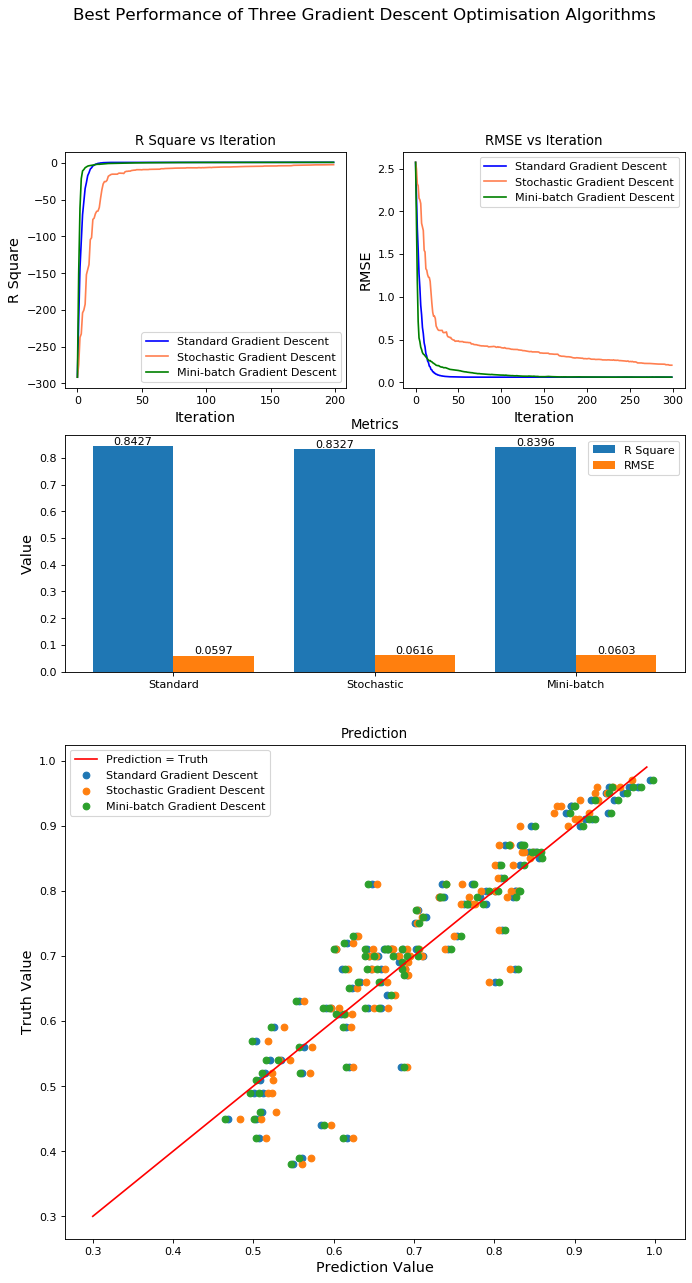

In [21]:
# Set Hyperparameters
iteration_list = np.array([1000, 10000, 10000])
eta_list = [1e-3, 1e-2, 1e-1]
batch_size = 20
epoch = (iteration_list / [1, len(x_train), len(x_train)/batch_size]).astype(int)

# Plot
plt.figure(figsize=(10,18), dpi=80)
# plt.figure(1)
ax1 = plt.subplot(421)
ax2 = plt.subplot(422)
ax3 = plt.subplot(412)
plt.xticks([index + 0.2 for index in [0,1,2]], ["Standard","Stochastic","Mini-batch"])
ax4 = plt.subplot(212)
axs = [ax1,ax2,ax3,ax4]
plt.suptitle('Best Performance of Three Gradient Descent Optimisation Algorithms', fontsize=15)

# R Square Plot
axs[0].set_xlabel('Iteration', fontdict={'weight': 'normal', 'size': 13})
axs[0].set_ylabel('R Square', fontdict={'weight': 'normal', 'size': 13})
axs[0].set_title("R Square vs Iteration")
N_0 = 200
# RMSE Plot
axs[1].set_xlabel('Iteration', fontdict={'weight': 'normal', 'size': 13})
axs[1].set_ylabel('RMSE', fontdict={'weight': 'normal', 'size': 13})
axs[1].set_title("RMSE vs Iteration")
N_1 = 300
# Metrics Plot
axs[2].set_ylabel('Value', fontdict={'weight': 'normal', 'size': 13})
axs[2].set_title("Metrics")
# Prediction Plot
x = np.arange(0.3, 1, 0.01) 
axs[3].plot(x, x, 'r-', label="Prediction = Truth")      # Plot the line y_pred = y_val 
axs[3].set_xlabel('Prediction Value', fontdict={'weight': 'normal', 'size': 13})
axs[3].set_ylabel('Truth Value', fontdict={'weight': 'normal', 'size': 13})
axs[3].set_title("Prediction")

R_Square_list = list()
RMSE_list = list()

#  Randomly initialize the vector of parameters θ (include interception) 
init_theta = initialize_theta(x_train.shape[1])

# Do Standard Gradient Descent 
optimal_theta, loss_list, r_square_list, rmse_list = standard_gradient_descent(init_theta, eta=eta_list[0], epoch=epoch[0])
axs[0].plot(r_square_list[:N_0], "b-", label=u"Standard Gradient Descent")
axs[1].plot(rmse_list[:N_1], "b-", label=u"Standard Gradient Descent")
R_Square, RMSE = validation_model(optimal_theta, plt=axs[3], label="Standard Gradient Descent", print_metrics=True)
R_Square_list.append(R_Square)
RMSE_list.append(RMSE)


# Do Stochastic Gradient Descent 
optimal_theta, loss_list, r_square_list, rmse_list = stochastic_gradient_descent(init_theta, eta=eta_list[1], epoch=epoch[1])
axs[0].plot(r_square_list[:N_0], "-", label=u"Stochastic Gradient Descent", color='coral') 
axs[1].plot(rmse_list[:N_1], "-", label=u"Stochastic Gradient Descent", color='coral')
R_Square, RMSE = validation_model(optimal_theta, plt=axs[3], label="Stochastic Gradient Descent", print_metrics=True)
R_Square_list.append(R_Square)
RMSE_list.append(RMSE)

# Do Mini-batch Gradient Descent
optimal_theta, loss_list, r_square_list, rmse_list =  mini_batch_gradient_descent(init_theta, eta=eta_list[2], epoch=epoch[2], batch_size=batch_size)
axs[0].plot(r_square_list[:N_0], "g-", label=u"Mini-batch Gradient Descent") 
axs[1].plot(rmse_list[:N_1], "g-", label=u"Mini-batch Gradient Descent")
R_Square, RMSE = validation_model(optimal_theta, plt=axs[3], label="Mini-batch Gradient Descent", print_metrics=True)
R_Square_list.append(R_Square)
RMSE_list.append(RMSE)

# Closed-Form Solution
print("\n----------Closed-Form Solution----------\nTheta:", ols.squeeze())

x = np.array(range(len(R_Square_list)))
rects1 = axs[2].bar(x, height=R_Square_list, width=0.4,  label="R Square")
rects2 = axs[2].bar(x+0.4, height=RMSE_list, width=0.4,  label="RMSE")
# plt.xticks([index + 0.2 for index in x], ["Standard","Stochastic","Mini-batch"])
for rect in rects1:
    height = rect.get_height()
    axs[2].text(rect.get_x() + rect.get_width() / 2, height, str(round((height),4)), ha="center", va="bottom")
for rect in rects2:
    height = rect.get_height()
    axs[2].text(rect.get_x() + rect.get_width() / 2, height, str(round((height),4)), ha="center", va="bottom")

axs[0].legend(loc="lower right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")
axs[3].legend(loc="upper left")
plt.show()